# Projet–Fouille de Données 
Thème : Classification des Tweets

### Sahar Boubaker 

In [1]:
import pandas as pd
import re

# Charger le fichier CSV
df = pd.read_csv("Fine-Tuning Large Language Models for Sentiment Classification of AI-Related Tweets.csv", encoding="latin1", header=0)

# Supprimer les lignes où la colonne 'Sentiment' est NaN
df_clean = df.dropna(subset=['Sentiment'])

# Vérifier le nombre de lignes valides dans 'Sentiment'
print(f"Nombre de lignes valides dans 'Sentiment' : {len(df_clean)}")

# Si le nombre de lignes valides est inférieur à 3000, ajuster la taille de l'échantillon
sample_size = min(3000, len(df_clean))

# Prendre un échantillon de manière aléatoire (ne pas dépasser le nombre de lignes valides)
df_sample = df_clean.sample(n=sample_size, random_state=42)

# Fonction de nettoyage des tweets
def clean_tweet(tweet):
    # Supprimer les mentions
    tweet = re.sub(r'@\w+', '', tweet)  # Supprime les mentions
    # Supprimer les URLs
    tweet = re.sub(r'http\S+', '', tweet)  # Supprime les URLs
    # Supprimer les hashtags
    tweet = re.sub(r'#', '', tweet)  # Supprime les hashtags
    # Supprimer les emojis et caractères spéciaux
    tweet = re.sub(r'[^\w\s]', '', tweet)  # Supprime les caractères spéciaux
    # Convertir en minuscules
    tweet = tweet.lower()
    tweet = re.sub(r'[ã\å\½\\â]', '', tweet)
    return tweet

# Appliquer la fonction de nettoyage à la colonne 'Tweets'
df_sample['Cleaned_Tweets'] = df_sample['Tweets'].apply(clean_tweet)

# Afficher les premières lignes du DataFrame avec la colonne nettoyée
print(df_sample.head())

# Vérifier qu'il n'y a plus de NaN dans 'Sentiment'
print(f"Nombre de NaN dans 'Sentiment' après échantillonnage : {df_sample['Sentiment'].isna().sum()}")


Nombre de lignes valides dans 'Sentiment' : 151
     Serial                                             Tweets Sentiment  \
76     78.0  Ã¢â¢ Ã¯Â¸Å½ \n \n I spent 20 years in financi...  Negative   
18     20.0  Renewable energy isn't the problem; it's part ...   Neutral   
82     84.0  5/ The true potential lies in combining AI and...  Positive   
81     83.0  He highlighted the incredible growth in commun...  Positive   
143   147.0  The future of #Innovation relies on us finding...  Positive   

                                        Cleaned_Tweets  
76     \n \n i spent 20 years in financial services...  
18   renewable energy isnt the problem its part of ...  
82   5 the true potential lies in combining ai and ...  
81   he highlighted the incredible growth in commun...  
143  the future of innovation relies on us finding ...  
Nombre de NaN dans 'Sentiment' après échantillonnage : 0


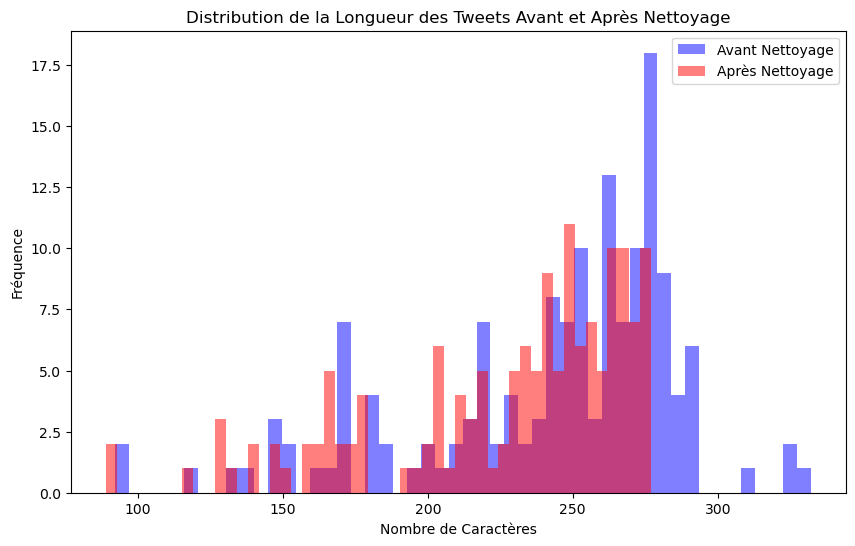

In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt
# Appliquer la fonction de nettoyage à la colonne 'Tweets'
df_sample['Cleaned_Tweets'] = df_sample['Tweets'].apply(clean_tweet)

# Calculer la longueur des tweets avant et après nettoyage
df_sample['Length_Before'] = df_sample['Tweets'].apply(len)
df_sample['Length_After'] = df_sample['Cleaned_Tweets'].apply(len)

# Créer un histogramme pour visualiser le volume de tweets avant et après nettoyage
plt.figure(figsize=(10, 6))

# Histogramme pour la longueur des tweets avant nettoyage
plt.hist(df_sample['Length_Before'], bins=50, alpha=0.5, label='Avant Nettoyage', color='blue')

# Histogramme pour la longueur des tweets après nettoyage
plt.hist(df_sample['Length_After'], bins=50, alpha=0.5, label='Après Nettoyage', color='red')

# Ajouter des labels et un titre
plt.title('Distribution de la Longueur des Tweets Avant et Après Nettoyage')
plt.xlabel('Nombre de Caractères')
plt.ylabel('Fréquence')
plt.legend()

# Afficher l'histogramme
plt.show()

# II.Traitement avec  NLTK 

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
# Télécharger les ressources nécessaires
nltk.download('punkt')  # Pour la tokenisation
nltk.download('stopwords')  # Pour les stopwords
nltk.download('wordnet')  # Pour la lemmatisation
# Initialiser le stemmer et la liste des stopwords
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Client\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Client\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Client\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
from nltk.stem import WordNetLemmatizer

# Initialisation du lemmatiseur
lemmatizer = WordNetLemmatizer()

def preprocess_tweet_with_lemma(tweet):
    # 1. Tokenisation
    tokens = word_tokenize(tweet)
    
    # 2. Suppression des stopwords
    tokens_no_stopwords = [word for word in tokens if word.lower() not in stop_words]
    
    # 3. Lemmatisation (avant ou après le stemming, selon ce que vous préférez)
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens_no_stopwords]
    
    # 4. Stemming (si nécessaire)
    stemmed_tokens = [stemmer.stem(word) for word in lemmatized_tokens]
    
    # 5. Rejoindre les tokens traités
    return ' '.join(stemmed_tokens)

# Appliquer le prétraitement avec lemmatisation sur chaque tweet
df_sample['Processed_Tweets'] = df_sample['Cleaned_Tweets'].apply(preprocess_tweet_with_lemma)

# Afficher le résultat
print(df_sample[['Tweets', 'Cleaned_Tweets', 'Processed_Tweets']].head())


                                                Tweets  \
76   Ã¢â¢ Ã¯Â¸Å½ \n \n I spent 20 years in financi...   
18   Renewable energy isn't the problem; it's part ...   
82   5/ The true potential lies in combining AI and...   
81   He highlighted the incredible growth in commun...   
143  The future of #Innovation relies on us finding...   

                                        Cleaned_Tweets  \
76     \n \n i spent 20 years in financial services...   
18   renewable energy isnt the problem its part of ...   
82   5 the true potential lies in combining ai and ...   
81   he highlighted the incredible growth in commun...   
143  the future of innovation relies on us finding ...   

                                      Processed_Tweets  
76   spent 20 year financi servic natur step would ...  
18   renew energi isnt problem part solut industri ...  
82   5 true potenti lie combin ai blockchain techno...  
81   highlight incred growth commun channel enterpr...  
143  futur innov 

In [10]:
import IPython.display as display
from IPython.core.display import HTML

# Fonction pour afficher les tweets avec mise en couleur et longueur
def display_colored_tweets_with_length(df):
    # Créer un tableau HTML pour les tweets
    html = "<table style='width:100%; border-collapse: collapse;'>"
    html += "<tr><th style='text-align:left;'>Tweet Original</th><th style='text-align:left;'>Longueur Original</th><th style='text-align:left;'>Tweet Nettoyé</th><th style='text-align:left;'>Longueur Nettoyé</th><th style='text-align:left;'>Tweet Processed_Tweets</th><th style='text-align:left;'>Longueur Processed_Tweets</th></tr>"
    
    # Ajouter chaque ligne de tweets dans le tableau
    for index, row in df.iterrows():
        original_tweet = f"<td style='background-color: #ffcccb; padding: 8px;'>{row['Tweets']}</td>"
        original_length = f"<td style='background-color: #ffcccb; padding: 8px;'>{len(row['Tweets'])}</td>"
        
        cleaned_tweet = f"<td style='background-color: #d3f8d3; padding: 8px;'>{row['Cleaned_Tweets']}</td>"
        cleaned_length = f"<td style='background-color: #d3f8d3; padding: 8px;'>{len(row['Cleaned_Tweets'])}</td>"
        
        processed_tweet = f"<td style='background-color: #cce5ff; padding: 8px;'>{row['Processed_Tweets']}</td>"
        processed_length = f"<td style='background-color: #cce5ff; padding: 8px;'>{len(row['Processed_Tweets'])}</td>"
        
        # Ajouter la ligne dans le tableau
        html += f"<tr>{original_tweet}{original_length}{cleaned_tweet}{cleaned_length}{processed_tweet}{processed_length}</tr>"
    
    # Fermer le tableau HTML
    html += "</table>"
    
    # Afficher le tableau HTML
    display.display(HTML(html))

# Appliquer la fonction d'affichage sur les 5 premiers tweets après nettoyage et prétraitement
display_colored_tweets_with_length(df_sample.head())


Tweet Original,Longueur Original,Tweet Nettoyé,Longueur Nettoyé,Tweet Processed_Tweets,Longueur Processed_Tweets
Ã¢â¢ Ã¯Â¸Å½ I spent 20 years in financial services So the natural step would be to 'idea sex' finance w/ the skills I've obtained in AI + digital business The problem? There's so many predatory people in that industry and they are running RAMPANT on social media Ã¢â¢ Ã¯Â¸Å½,293,i spent 20 years in financial services so the natural step would be to idea sex finance w the skills ive obtained in ai digital business the problem theres so many predatory people in that industry and they are running rampant on social media,264,spent 20 year financi servic natur step would idea sex financ w skill ive obtain ai digit busi problem there mani predatori peopl industri run rampant social medium,164
Renewable energy isn't the problem; it's part of the solution. The industry needs to adapt to the unanticipated energy demand from AI. Embracing clean energy while ensuring AI companies invest in their power needs will help balance the grid and sustain growth.,260,renewable energy isnt the problem its part of the solution the industry needs to adapt to the unanticipated energy demand from ai embracing clean energy while ensuring ai companies invest in their power needs will help balance the grid and sustain growth,254,renew energi isnt problem part solut industri need adapt unanticip energi demand ai embrac clean energi ensur ai compani invest power need help balanc grid sustain growth,170
5/ The true potential lies in combining AI and blockchain technologies. Leveraging these two powerful paradigms together can provide comprehensive solutions to the multifaceted problems plaguing the industry while aslo unlocking new and enhanced experiences for fans and artists,278,5 the true potential lies in combining ai and blockchain technologies leveraging these two powerful paradigms together can provide comprehensive solutions to the multifaceted problems plaguing the industry while aslo unlocking new and enhanced experiences for fans and artists,276,5 true potenti lie combin ai blockchain technolog leverag two power paradigm togeth provid comprehens solut multifacet problem plagu industri aslo unlock new enhanc experi fan artist,182
"He highlighted the incredible growth in communication channels for enterprises to engage and fulfil the need for a better #CustomerExperience. With the integration of #AI technologies, it is now possible to create industry-specific solutions and solve critical problems.",270,he highlighted the incredible growth in communication channels for enterprises to engage and fulfil the need for a better customerexperience with the integration of ai technologies it is now possible to create industryspecific solutions and solve critical problems,264,highlight incred growth commun channel enterpris engag fulfil need better customerexperi integr ai technolog possibl creat industryspecif solut solv critic problem,163
"The future of #Innovation relies on us finding a solution to the emissions problem that's currently building. The demand for sophisticated #AI in every industry calls for real-world solutions, and the #FinTech sector is hard at work cracking the code. #Sustainability",267,the future of innovation relies on us finding a solution to the emissions problem thats currently building the demand for sophisticated ai in every industry calls for realworld solutions and the fintech sector is hard at work cracking the code sustainability,258,futur innov reli u find solut emiss problem that current build demand sophist ai everi industri call realworld solut fintech sector hard work crack code sustain,160


# III.Classification

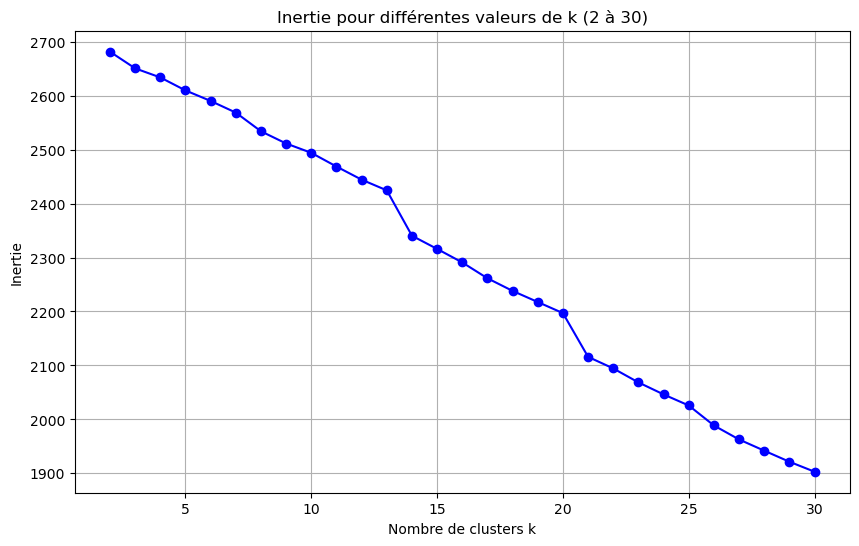

                                      Processed_Tweets  Cluster_k5
76   spent 20 year financi servic natur step would ...           1
18   renew energi isnt problem part solut industri ...           1
82   5 true potenti lie combin ai blockchain techno...           1
81   highlight incred growth commun channel enterpr...           1
143  futur innov reli u find solut emiss problem th...           1
31   would great x ai imag detect built legaci medi...           1
78   ai trust problem major concern today tech indu...           1
64   think guardrail protect user ai system good id...           1
55   pleas dont tri includ combin blockchain ai ind...           1
85   word use new tech like ai anim industri bring ...           1


In [13]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Fonction pour calculer la distance de Jaccard
def jaccard_distance(set1, set2):
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return 1 - intersection / union if union != 0 else 1

# Étape 1 : Convertir les tweets traités en ensembles de mots
df_sample['Processed_Tweets'] = df_sample['Processed_Tweets'].astype(str)
sets_of_words = [set(tweet.split()) for tweet in df_sample['Processed_Tweets']]

# Étape 2 : Calculer la matrice de distance de Jaccard
distance_matrix = np.array([[jaccard_distance(set1, set2) for set2 in sets_of_words] for set1 in sets_of_words])

# Étape 3 : Transformer la distance de Jaccard en une matrice de caractéristiques binaires
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(df_sample['Processed_Tweets'])

# Étape 4 : Appliquer K-Means sur les vecteurs binaires
inertia_values = []  # Liste pour stocker l'inertie

for k in range(2, 31):  # Tester k = 2 à 30
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    
    # Ajouter les labels des clusters au DataFrame
    df_sample[f'Cluster_k{k}'] = kmeans.labels_
    
    # Enregistrer l'inertie
    inertia_values.append(kmeans.inertia_)

# Étape 5 : Visualiser l'inertie
plt.figure(figsize=(10, 6))
plt.plot(range(2, 31), inertia_values, marker='o', color='b')
plt.title('Inertie pour différentes valeurs de k (2 à 30)')
plt.xlabel('Nombre de clusters k')
plt.ylabel('Inertie')
plt.grid()
plt.show()

# Étape 6 : Afficher les clusters pour un k choisi (par exemple k=5)
chosen_k = 5
print(df_sample[['Processed_Tweets', f'Cluster_k{chosen_k}']].head(10))


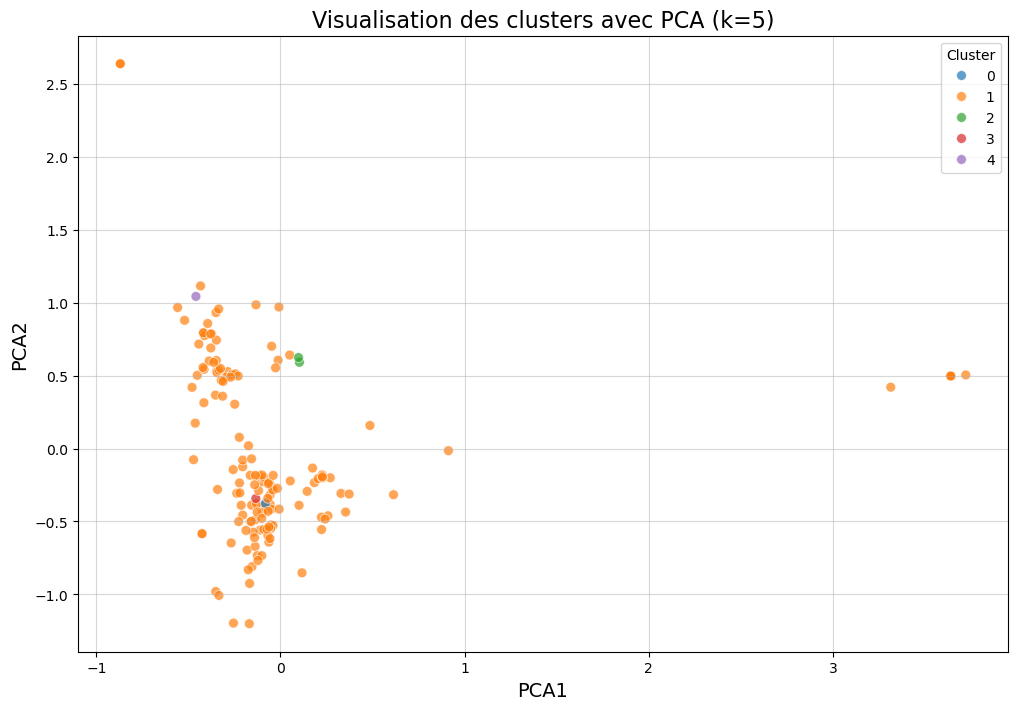

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Étape 1 : Réduction de dimension avec PCA
chosen_k = 5  # Choisir une valeur de k à visualiser
kmeans = KMeans(n_clusters=chosen_k, random_state=42)
kmeans.fit(X)

# Appliquer PCA pour réduire les dimensions à 2
pca = PCA(n_components=2, random_state=42)
reduced_data = pca.fit_transform(X.toarray())

# Ajouter les labels des clusters au DataFrame
df_sample['PCA1'] = reduced_data[:, 0]
df_sample['PCA2'] = reduced_data[:, 1]
df_sample['Cluster'] = kmeans.labels_

# Étape 2 : Visualisation des clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', data=df_sample, palette='tab10', s=50, alpha=0.7
)
plt.title(f'Visualisation des clusters avec PCA (k={chosen_k})', fontsize=16)
plt.xlabel('PCA1', fontsize=14)
plt.ylabel('PCA2', fontsize=14)
plt.legend(title='Cluster')
plt.grid(alpha=0.5)
plt.show()


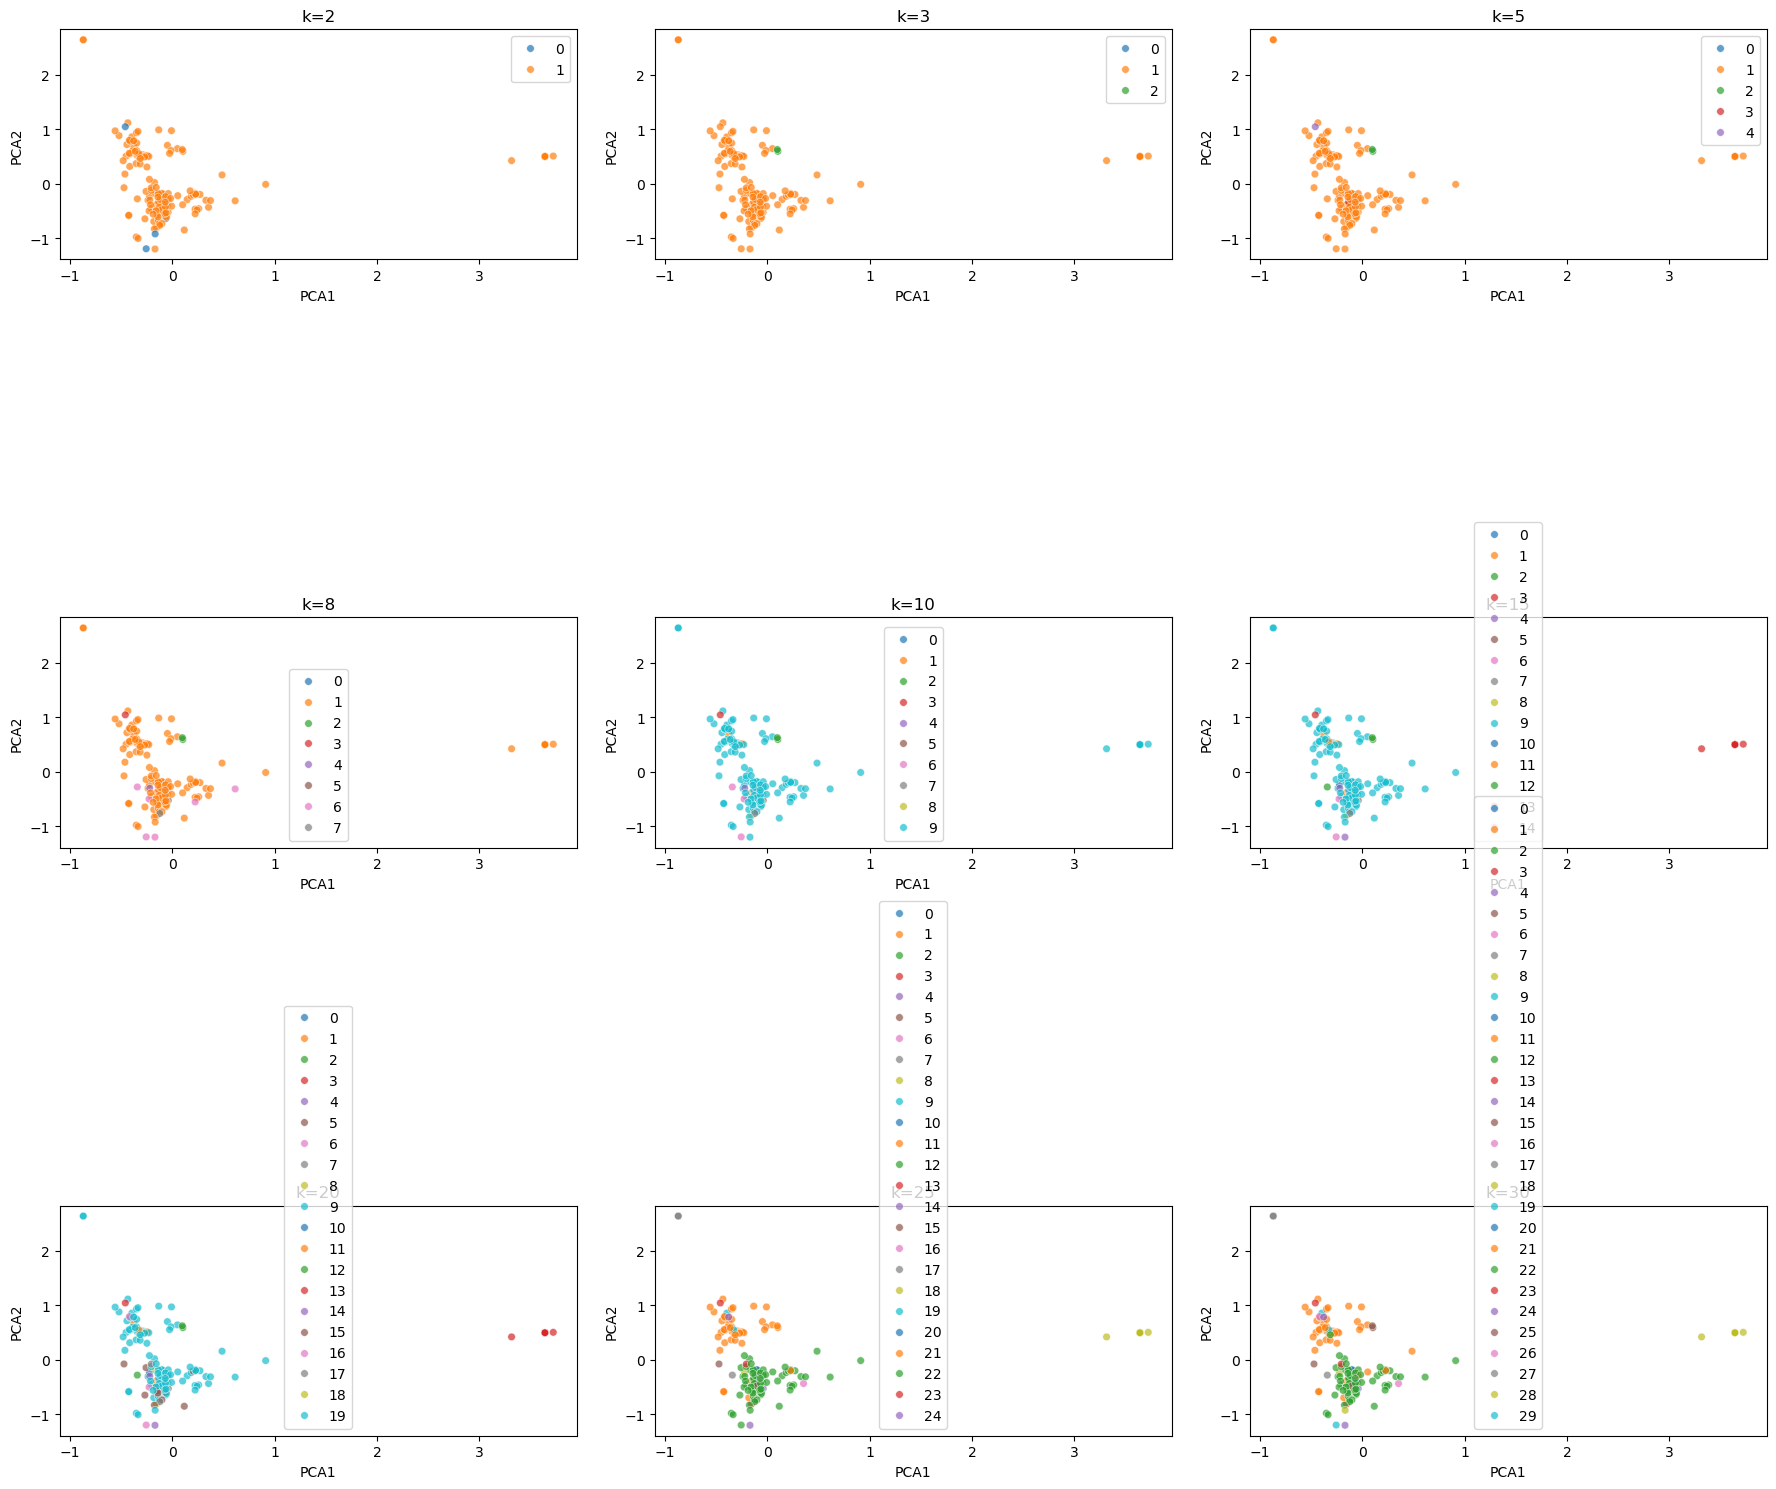

In [19]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))  # 9 visualisations (3x3)
k_values = [2, 3, 5, 8, 10, 15, 20, 25, 30]  # Différentes valeurs de k à essayer

for ax, k in zip(axes.flatten(), k_values):
    # Étape 1 : Clustering avec k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)

    # Ajouter les labels au DataFrame temporaire
    df_sample['Cluster'] = kmeans.labels_

    # Étape 2 : Visualisation avec PCA
    sns.scatterplot(
        x=reduced_data[:, 0],
        y=reduced_data[:, 1],
        hue=kmeans.labels_,
        palette='tab10',
        s=30,
        ax=ax,
        alpha=0.7,
    )
    ax.set_title(f'k={k}')
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')

plt.tight_layout()
plt.show()


In [23]:
pip install fuzzy-c-means


Note: you may need to restart the kernel to use updated packages.


                                      Processed_Tweets  fcm_cluster
76   spent 20 year financi servic natur step would ...            0
18   renew energi isnt problem part solut industri ...            0
82   5 true potenti lie combin ai blockchain techno...            1
81   highlight incred growth commun channel enterpr...            1
143  futur innov reli u find solut emiss problem th...            2


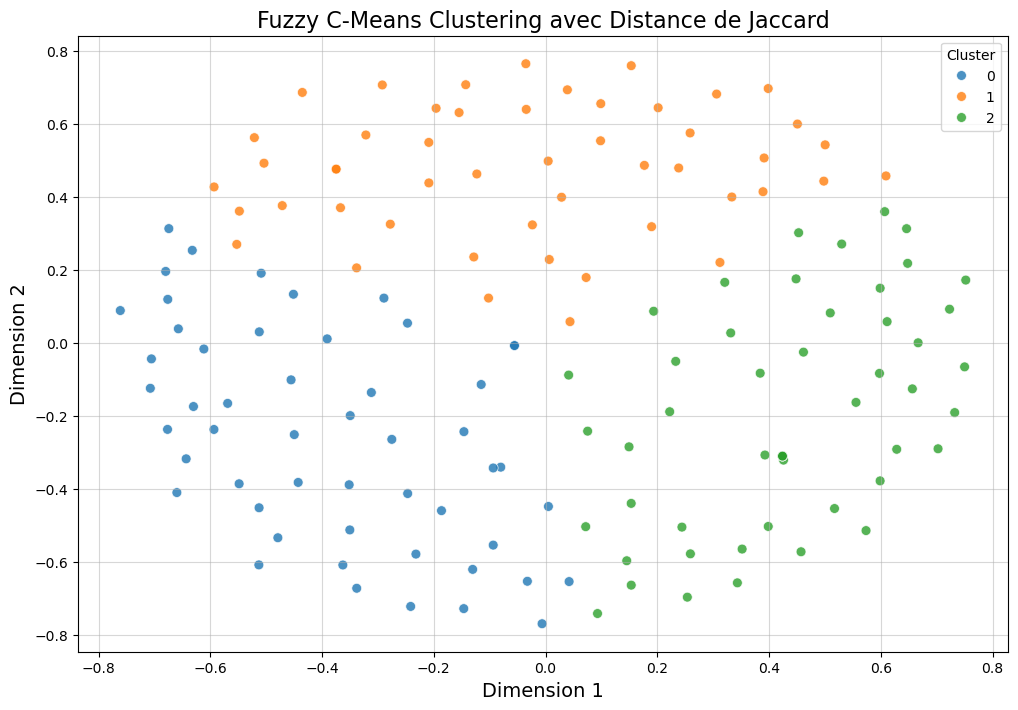

In [29]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import pairwise_distances
from fcmeans import FCM  # Bibliothèque Fuzzy C-Means
import matplotlib.pyplot as plt
import seaborn as sns

# Fonction pour calculer la distance de Jaccard entre deux ensembles de mots
def jaccard_distance(set1, set2):
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return 1 - intersection / union if union != 0 else 1

# Convertir les tweets traités en ensembles de mots
sets_of_words = [set(tweet.split()) for tweet in df_sample['Processed_Tweets']]

# Calculer la matrice de distance de Jaccard (matrice carrée de distances entre chaque paire de tweets)
distance_matrix = np.array([[jaccard_distance(set1, set2) for set2 in sets_of_words] for set1 in sets_of_words])

# Réduction de la dimension de la matrice de distance en utilisant MDS (Multidimensional Scaling)
from sklearn.manifold import MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
reduced_vectors = mds.fit_transform(distance_matrix)

# Appliquer Fuzzy C-Means sur les vecteurs réduits
fcm = FCM(n_clusters=3, random_state=42)  # Ajuster le nombre de clusters si nécessaire
fcm.fit(reduced_vectors)

# Obtenir les étiquettes floues (appartenance maximale)
labels_fcm = fcm.u.argmax(axis=1)

# Ajouter les labels de clusters au DataFrame
df_sample['fcm_cluster'] = labels_fcm

# Affichage des résultats du clustering Fuzzy C-Means pour les premiers clusters
print(df_sample[['Processed_Tweets', 'fcm_cluster']].head())

# Visualisation des clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=reduced_vectors[:, 0], y=reduced_vectors[:, 1],
    hue=labels_fcm, palette='tab10', s=50, alpha=0.8
)
plt.title(f'Fuzzy C-Means Clustering avec Distance de Jaccard', fontsize=16)
plt.xlabel('Dimension 1', fontsize=14)
plt.ylabel('Dimension 2', fontsize=14)
plt.legend(title='Cluster')
plt.grid(alpha=0.5)
plt.show()


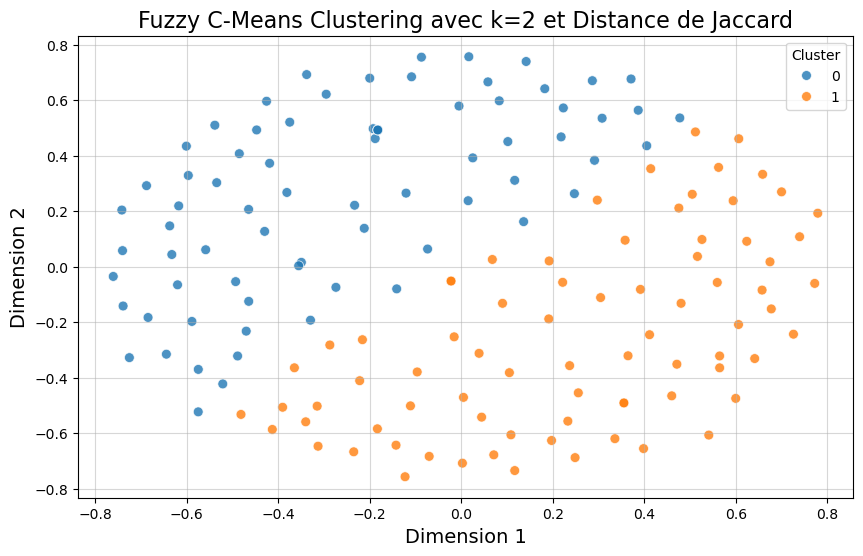

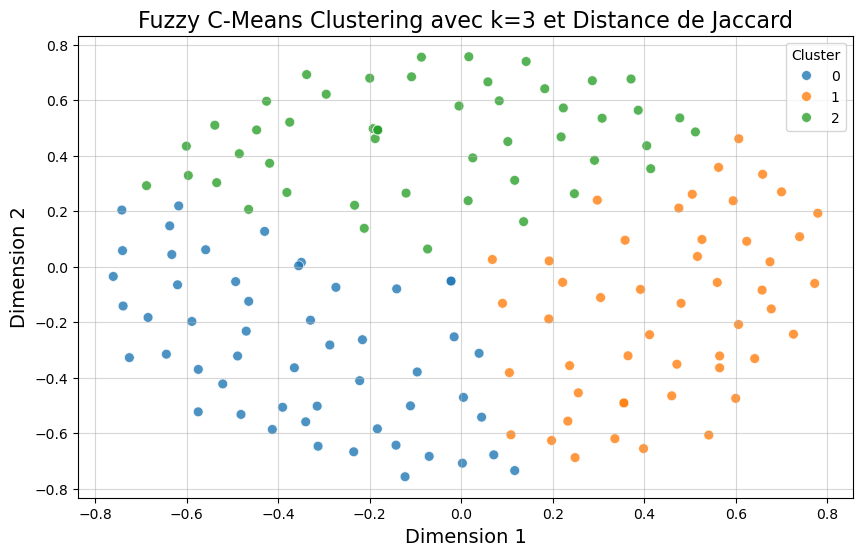

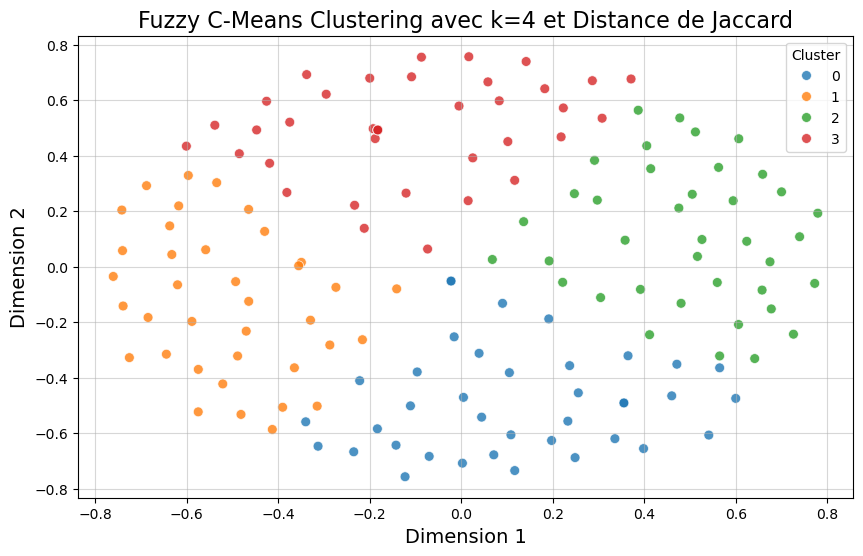

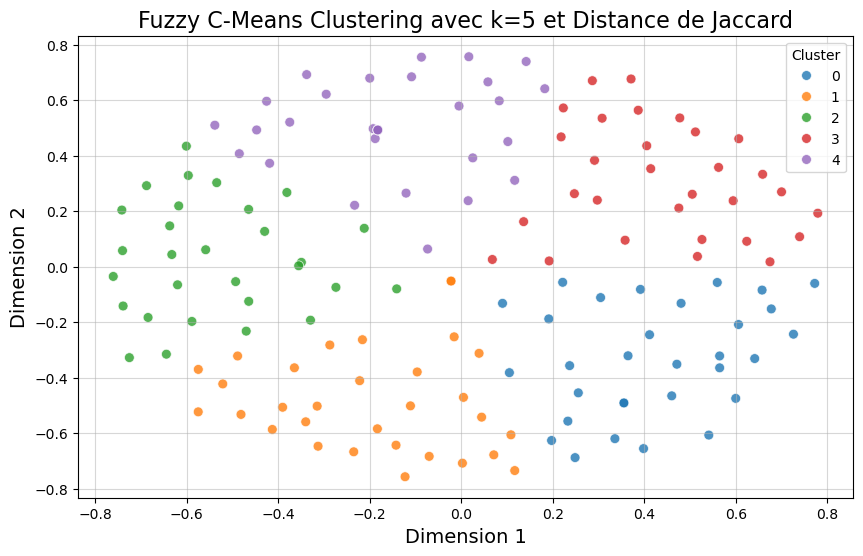

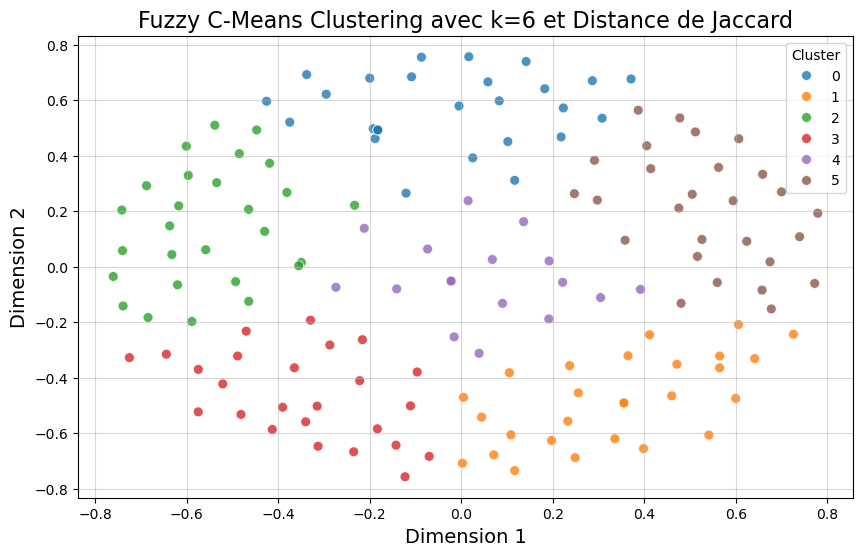

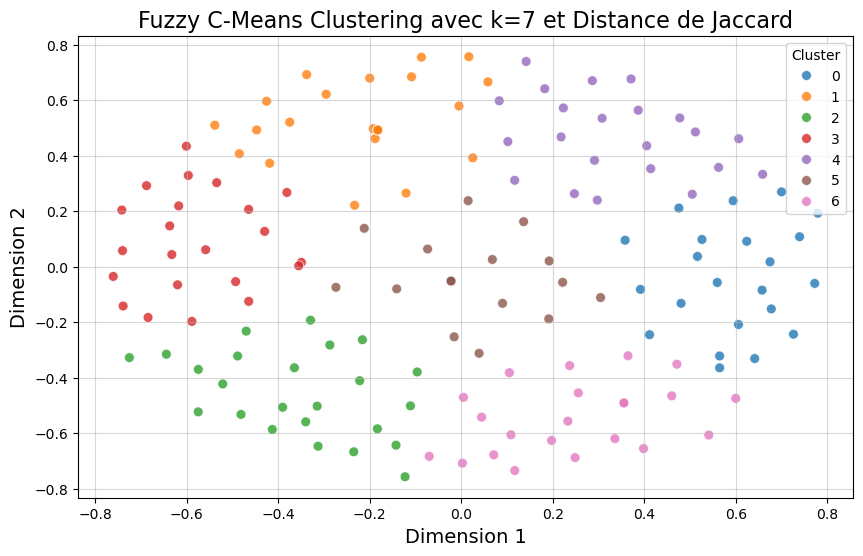

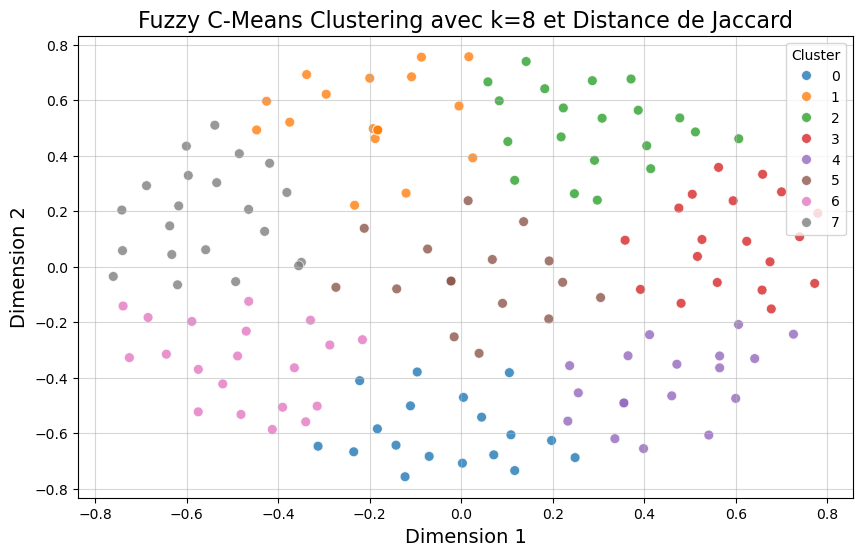

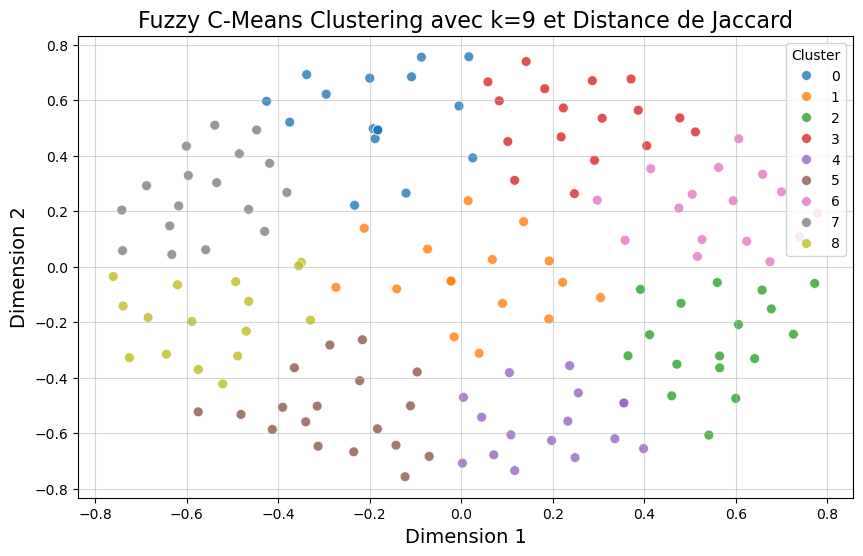

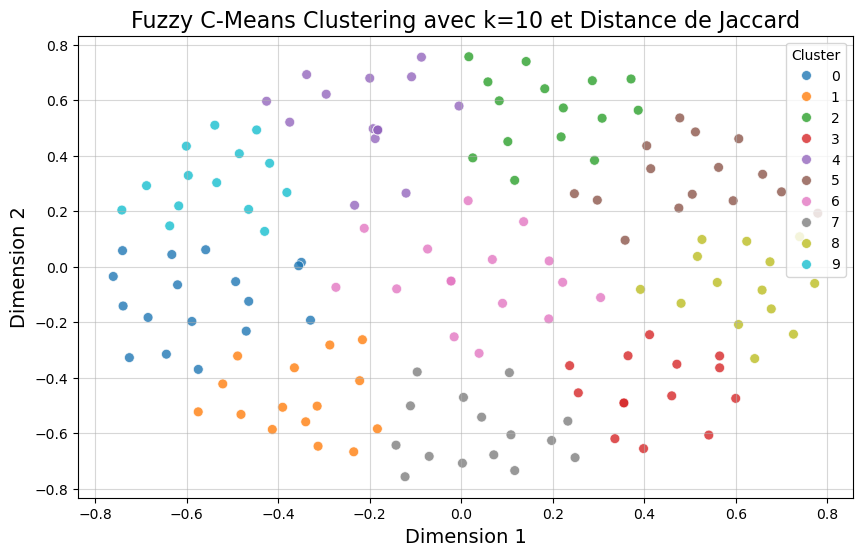

In [37]:
import numpy as np
import pandas as pd
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from fcmeans import FCM  # Bibliothèque Fuzzy C-Means
import matplotlib.pyplot as plt
import seaborn as sns

# Fonction pour calculer la distance de Jaccard entre deux ensembles de mots
def jaccard_distance(set1, set2):
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return 1 - intersection / union if union != 0 else 1

# Convertir les tweets traités en ensembles de mots
sets_of_words = [set(tweet.split()) for tweet in df_sample['Processed_Tweets']]

# Calculer la matrice de distance de Jaccard (matrice carrée de distances entre chaque paire de tweets)
distance_matrix = np.array([[jaccard_distance(set1, set2) for set2 in sets_of_words] for set1 in sets_of_words])

# Réduction de la dimension de la matrice de distance en utilisant MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
reduced_vectors = mds.fit_transform(distance_matrix)

# Appliquer PCA pour réduire à 2 dimensions supplémentaires si nécessaire
pca = PCA(n_components=2)
pca_vectors = pca.fit_transform(reduced_vectors)

# Essayer différentes valeurs de k pour FCM (par exemple, de 2 à 10)
for k in range(2, 11):  # Tester pour k de 2 à 10
    fcm = FCM(n_clusters=k, random_state=42)
    fcm.fit(pca_vectors)
    
    # Obtenir les labels de cluster pour chaque valeur de k
    labels_fcm = fcm.u.argmax(axis=1)
    
    # Ajouter les labels de clusters au DataFrame
    df_sample[f'fcm_cluster_k{k}'] = labels_fcm

    # Visualiser les clusters avec PCA
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=pca_vectors[:, 0], y=pca_vectors[:, 1], 
        hue=labels_fcm, palette='tab10', s=50, alpha=0.8
    )
    plt.title(f'Fuzzy C-Means Clustering avec k={k} et Distance de Jaccard', fontsize=16)
    plt.xlabel('Dimension 1', fontsize=14)
    plt.ylabel('Dimension 2', fontsize=14)
    plt.legend(title='Cluster')
    plt.grid(alpha=0.5)
    plt.show()


# Tweet par classe comme représentant

In [41]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances
import matplotlib.pyplot as plt

# Fonction pour calculer la distance de Jaccard entre deux ensembles de mots
def jaccard_distance(set1, set2):
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return 1 - intersection / union if union != 0 else 1

# Convertir les tweets traités en ensembles de mots
sets_of_words = [set(tweet.split()) for tweet in df_sample['Processed_Tweets']]

# Calculer la matrice de distance de Jaccard
distance_matrix = np.array([[jaccard_distance(set1, set2) for set2 in sets_of_words] for set1 in sets_of_words])

# Appliquer K-Means pour un certain nombre de clusters (k)
kmeans = KMeans(n_clusters=3, random_state=42)  # Ajuster k selon besoin
kmeans.fit(distance_matrix)

# Ajouter les labels de clusters au DataFrame
df_sample['kmeans_cluster'] = kmeans.labels_

# Fonction pour trouver le tweet le plus proche du centroïde (utilisant la distance de Jaccard)
def get_representative_tweet(cluster_id, kmeans, distance_matrix, df_sample):
    # Index des tweets dans ce cluster
    cluster_indices = np.where(kmeans.labels_ == cluster_id)[0]
    
    # Calculer les distances des tweets au centroïde du cluster
    centroid = kmeans.cluster_centers_[cluster_id]
    distances_to_centroid = pairwise_distances([centroid], distance_matrix[cluster_indices])
    
    # Trouver l'index du tweet le plus proche du centroïde
    representative_idx = cluster_indices[np.argmin(distances_to_centroid)]
    
    return df_sample.iloc[representative_idx]

# Choisir un tweet représentatif pour chaque cluster
representative_tweets = []
for cluster_id in range(3):  # Ajuster selon le nombre de clusters
    representative_tweet = get_representative_tweet(cluster_id, kmeans, distance_matrix, df_sample)
    representative_tweets.append(representative_tweet)

# Afficher les tweets représentatifs
for i, tweet in enumerate(representative_tweets):
    print(f"Cluster {i+1} - Représentatif Tweet: {tweet['Processed_Tweets']}")



Cluster 1 - Représentatif Tweet: problem subcontract tradi bank wont give loan peopl leav hous wage get home loan work continu pain hous industri inconsist pay month non payer builder
Cluster 2 - Représentatif Tweet: googl collabor local hospit develop aitool earli breast cancer detect medic applic googl collabor integr ai health industri solv problem
Cluster 3 - Représentatif Tweet: tune tech latest podcast episod tokyo correspond ryohtaroh satoh talk japan auto industri face grow ai chip problem appl


C:\Users\Client\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [45]:
import numpy as np
import pandas as pd
from fcmeans import FCM  # Bibliothèque Fuzzy C-Means
from sklearn.metrics.pairwise import pairwise_distances

# Fonction pour calculer la distance de Jaccard entre deux ensembles de mots
def jaccard_distance(set1, set2):
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return 1 - intersection / union if union != 0 else 1

# Convertir les tweets traités en ensembles de mots
sets_of_words = [set(tweet.split()) for tweet in df_sample['Processed_Tweets']]

# Calculer la matrice de distance de Jaccard
distance_matrix = np.array([[jaccard_distance(set1, set2) for set2 in sets_of_words] for set1 in sets_of_words])

# Appliquer FCM pour un certain nombre de clusters
fcm = FCM(n_clusters=3, random_state=42)
fcm.fit(distance_matrix)

# Obtenir les étiquettes de cluster (appartenance floue)
labels_fcm = fcm.u.argmax(axis=1)
df_sample['fcm_cluster'] = labels_fcm

# Fonction pour trouver le tweet le plus proche du centroïde (utilisant la distance de Jaccard)
def get_representative_tweet_fcm(cluster_id, fcm, distance_matrix, df_sample):
    # Index des tweets dans ce cluster
    cluster_indices = np.where(labels_fcm == cluster_id)[0]
    
    # Calculer les distances des tweets au centroïde du cluster
    centroid = fcm.centers[cluster_id]
    distances_to_centroid = pairwise_distances([centroid], distance_matrix[cluster_indices])
    
    # Trouver l'index du tweet le plus proche du centroïde
    representative_idx = cluster_indices[np.argmin(distances_to_centroid)]
    
    return df_sample.iloc[representative_idx]

# Choisir un tweet représentatif pour chaque cluster
representative_tweets_fcm = []
for cluster_id in range(3):  # Ajuster selon le nombre de clusters
    representative_tweet = get_representative_tweet_fcm(cluster_id, fcm, distance_matrix, df_sample)
    representative_tweets_fcm.append(representative_tweet)

# Afficher les tweets représentatifs pour FCM
for i, tweet in enumerate(representative_tweets_fcm):
    print(f"Cluster {i+1} - Représentatif Tweet: {tweet['Processed_Tweets']}")


Cluster 1 - Représentatif Tweet: mark word pass law europ flunk ai industri togeth forev beholden american decad europ back water alreadi due mire problem
Cluster 2 - Représentatif Tweet: ai rampag climat target paint log line problem ëthe industri problem life earth consequ deadli nuclear arm race
Cluster 3 - Représentatif Tweet: compet major compani ai industri daunt startup due high risk thank tackl problem 6079ai
